In [1]:
#1928152 Animesh Pathak
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics


plt.rcParams['figure.figsize'] = (12.0, 9.0)
df1 = pd.read_csv('C:\\Users\\KIIT\\Downloads\\twentyscience.csv')
#Kaggle Dataset https://www.kaggle.com/federicoseijo/twenty-one-pilots-discography/version/1
df1.describe()

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
print("Normal Data")
print(df_norm)

Normal Data
     Unnamed: 0  album_release_year  danceability    energy       key  \
0      0.000000                 1.0      0.745098  0.715505  0.636364   
1      0.007752                 1.0      0.771242  0.701280  0.636364   
2      0.015504                 1.0      0.588235  0.911369  0.818182   
3      0.023256                 1.0      0.910131  0.656418  1.000000   
4      0.031008                 1.0      0.750000  0.948572  0.727273   
..          ...                 ...           ...       ...       ...   
125    0.968992                 0.0      0.526144  0.658606  0.090909   
126    0.976744                 0.0      0.637255  0.775687  0.454545   
127    0.984496                 0.0      0.553922  0.600613  0.818182   
128    0.992248                 0.0      0.220588  0.122442  0.636364   
129    1.000000                 0.0      0.857843  0.435387  0.636364   

     loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    0.852596   1.0     0.015640 

In [2]:
df1.isnull().sum()

Unnamed: 0            0
album_release_year    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
disc_number           0
duration_ms           0
explicit              0
is_local              0
track_number          0
dtype: int64

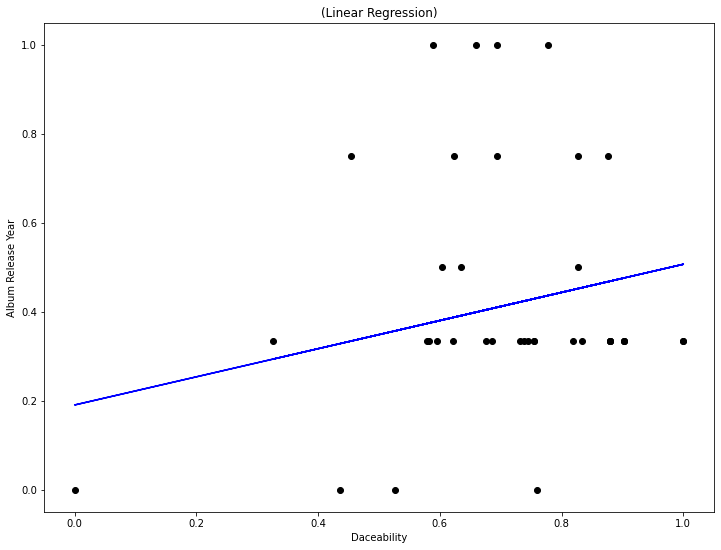

RMSE : 0.2414859185800835 R2_SCORE:  0.0463387171307752


In [3]:
X = df_norm.iloc[:, 2:3].values
Y = df_norm.iloc[:, 1].values 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

def linear():
    plt.scatter(X_test, Y_test, color='black')
    plt.plot(X_test, lin_reg.predict(X_test), color='blue')
    plt.title('(Linear Regression)')
    plt.xlabel('Daceability')
    plt.ylabel('Album Release Year')
    plt.show()
    return
linear()

y_train_predict = lin_reg.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2=r2_score(Y_train,y_train_predict)
print('RMSE :',rmse,'R2_SCORE: ',r2)

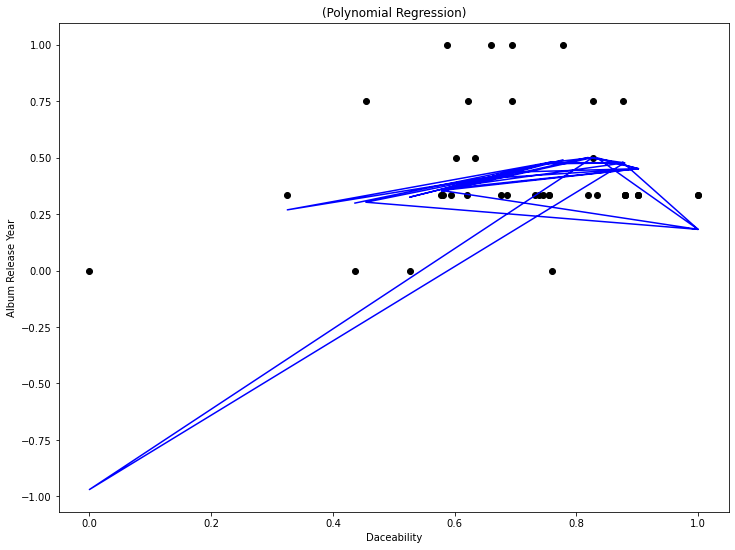

RMSE : 0.23221562692591352 R2_SCORE:  0.11815265272779696


In [4]:
degree=4
poly_reg = PolynomialFeatures(degree)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y_train)

def polymonial():
    plt.scatter(X_test, Y_test, color='black')
    plt.plot(X_test, pol_reg.predict(poly_reg.fit_transform(X_test)), color='blue')
    plt.title('(Polynomial Regression)')
    plt.xlabel('Daceability')
    plt.ylabel('Album Release Year')
    plt.show()
    return
polymonial()

y_train_predict1 = pol_reg.predict(X_poly)
rmse1=(np.sqrt(mean_squared_error(Y_train,y_train_predict1)))
r2_1=r2_score(Y_train,y_train_predict1)
print('RMSE :',rmse1,'R2_SCORE: ',r2_1)

RMSE : 0.2773500981126146 R2_SCORE:  -0.08333333333333282


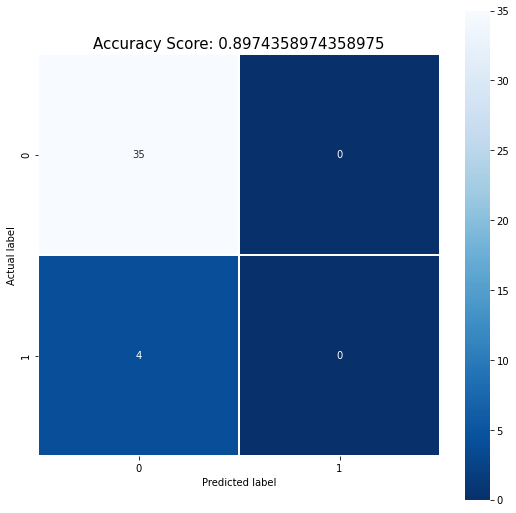

In [5]:
X = df_norm.iloc[:, 0:1].values
Y = df_norm.iloc[:, 1].values 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train.astype(int))

p_model = model.predict(X_test)
score = model.score(X_test, Y_test.astype(int))
cm = metrics.confusion_matrix(Y_test.astype(int), p_model)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

y_train_predict2 = model.predict(X_train)
rmse2=(np.sqrt(mean_squared_error(Y_train.astype(int),y_train_predict2)))
r2_2=r2_score(Y_train.astype(int),y_train_predict2)
print('RMSE :',rmse2,'R2_SCORE: ',r2_2)